## BBVA Data Challenge 2023 - JPachas

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbva-data-challenge-2023/digital.csv
/kaggle/input/bbva-data-challenge-2023/Diccionario de datos.xlsx
/kaggle/input/bbva-data-challenge-2023/archive/sample_submission.csv
/kaggle/input/bbva-data-challenge-2023/archive/balances.csv
/kaggle/input/bbva-data-challenge-2023/archive/universe_train.csv
/kaggle/input/bbva-data-challenge-2023/archive/movements.csv
/kaggle/input/bbva-data-challenge-2023/archive/liabilities.csv
/kaggle/input/bbva-data-challenge-2023/archive/universe_test.csv
/kaggle/input/bbva-data-challenge-2023/archive/customers.csv


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Universo

In [4]:
universe_train = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/archive/universe_train.csv')
universe_test  = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/archive/universe_test.csv')

La base de train es la que cuenta con la variable **attrition**, la cual indica el motivo de abandono del segmento objetivo.

In [5]:
universe_train.head()

,ID,attrition,period
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5
2,270d8f8f607d19886c50edb7746c3670194134b56d31e2...,0,period_5
3,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5
4,98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7...,0,period_5


<Axes: xlabel='attrition', ylabel='count'>

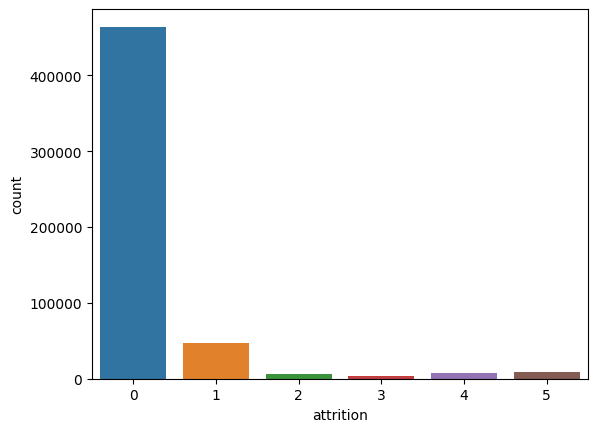

In [6]:
sns.countplot(data = universe_train, x = 'attrition')

In [7]:
universe_train.groupby(['period','attrition']).count()

ID
period   attrition       
period_1 0          74991
         1           7329
         2            872
         3            512
         4           1137
         5           1187
period_2 0          75824
         1           7752
         2            967
         3            539
         4           1097
         5           1207
period_3 0          77704
         1           7434
         2            940
         3            541
         4           1097
         5           1282
period_4 0          78894
         1           7860
         2            989
         3            596
         4           1110
         5           1471
period_5 0          79111
         1           7901
         2           1095
         3            592
         4           1130
         5           1710
period_6 0          77551
         1           8895
         2           1066
         3            606
         4           1322
         5           1632

In [11]:
universe_train.groupby(['ID']).count().sort_values('period', ascending = False)

,attrition,period
ID,,
00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd92ba7d880f22dfc0c4a,1,1
aada068586d517135521f8e6789b88bcf3ae8750d4a7f914ad4384e7770f0e39,1,1
aad9f65eed1c695d62c1f4aee0000ef1ed9a85d05fd2cbd22b8382a48440c330,1,1
aad9bdd6c486d2487920316a1151f8631975c4513f35d8269c6685e084f61971,1,1
aad9bcc9e93ec81ab9930eb158030bf04f51d8747c082754abc884c5d1e30c6b,1,1
...,...,...
558602858281b924504d5bd7b69a6ab2599c6cb88bdf8513564497e0bd330af2,1,1
5585eff96777ad6e88c7bc878aa66c529b15b5caffb36638662b970ea3f41cb9,1,1
5585ebcaab14e527d756dbe67b03c7368def6e7267194f5d630a8d57a4c35ca9,1,1


Debemos generar las predicciones para el universo de test.

In [12]:
universe_test.head()

,ID,period
0,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9
1,4881d4a2146002a02279bedb6f0a844af022b4dd1d8b1b...,period_9
2,28ff12351f215091b54166a09ca44858f3d7f6245f281c...,period_9
3,5cd2c0dc92c1c5ffa83a94f15756cef5c58174e9d8c69a...,period_9
4,ceebdd2bbaafd83d8c205e8071b79da5338e9db94c9509...,period_9


In [13]:
universe_test.groupby(['ID']).count().sort_values('period', ascending = False)

,period
ID,
00009bb00e84af44d1abc86b9fbd155842ffef6cad814d0244655051659fdbff,1
aa7d185a909a560ead4391a9295e274dc9cf9c11a926bf2e58d5f3ff6839132a,1
aa7a3f407cdff95fcd1350fddc7004fd7e288561ceda98f3d68bdccf82fde0f3,1
aa7a81cc3890614e799dd97e07ad64a9e51b6e6853ad97b79411e27a30d12ac7,1
aa7ab2ce2fcd8df814633ecdac6802ca5e55f66d2f09ec3d43201e65e5ba4400,1
...,...
5588b26feaeb955adf2a0ab61264af0e1e6b1c7eafbe9e64a19d70cb4a402b98,1
55891eec4196e51622cc60b45bfd5f972a2acfd1346a852de5b247d4e73e2548,1
558954eb1fe900f626067e30fcc4ea899bd5f374c40290fb7654bf807e26cb29,1


In [14]:
universe_test.groupby(['period']).count()

,ID
period,
period_7,90314
period_8,90610
period_9,92712


# 2. Customer

Contiene datos sociodemográficos; también, de tenencia de productos y ofertas en el banco.

La función siguiente permite leer los datos y transformar las columnas categóricas a numéricas.

In [128]:
def varCustomer():
    # Leer la base
    df_customers = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/archive/customers.csv')
    
    # Columnas binarias
    for col_ in ['product_1', 'product_2', 'product_3', 'product_4', 'ofert_1', 'ofert_2', 'ofert_3']:
        df_customers[col_] = df_customers[col_].apply(lambda x: 1 if x=='Yes' else 0)
        
    # Generar dummies
    df_customers = pd.get_dummies(df_customers, columns = ['type_job', 'bureau_risk'], dtype=int)
    
    return df_customers

In [19]:
#df_customers = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/archive/customers.csv')
#df_customers.head()

,ID,age,income,time_from_specialized,type_job,bureau_risk,payroll,product_1,product_2,product_3,product_4,ofert_1,ofert_2,ofert_3
0,42af3bf64c2c14307361e970e76c9653df78b215838971...,4.2484,4.1259,0.0,type_2,category_4,4.8095,Yes,No,No,Yes,No,No,No
1,5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926...,4.6903,3.9570,0.0,type_7,category_9,0.0000,No,No,No,Yes,No,No,No
2,8e40f988dd93417a0a40c32e65386425d891c879fedf4c...,4.1682,4.4640,0.0,type_7,category_5,0.0000,No,No,No,Yes,No,No,No
3,0e48974ce6e81d9e81a8da780521a2f98fb2385dc879df...,3.9651,4.0966,0.0,type_7,category_3,0.0000,Yes,Yes,Yes,Yes,No,No,No
4,e033c53b4fb230de5da6868503a9e079b289e064d62de4...,3.9576,4.1876,0.0,type_7,category_5,0.0000,Yes,No,No,Yes,No,No,No


In [20]:
#df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809579 entries, 0 to 809578
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     809579 non-null  object 
 1   age                    809579 non-null  float64
 2   income                 809579 non-null  float64
 3   time_from_specialized  809579 non-null  float64
 4   type_job               809579 non-null  object 
 5   bureau_risk            809579 non-null  object 
 6   payroll                809579 non-null  float64
 7   product_1              809579 non-null  object 
 8   product_2              809579 non-null  object 
 9   product_3              809579 non-null  object 
 10  product_4              809579 non-null  object 
 11  ofert_1                809579 non-null  object 
 12  ofert_2                809579 non-null  object 
 13  ofert_3                809579 non-null  object 
dtypes: float64(4), object(10)
memory usa

In [17]:
df_customers = varCustomer()

In [18]:
df_customers.head()

,ID,age,income,time_from_specialized,payroll,product_1,product_2,product_3,product_4,ofert_1,...,type_job_type_6,type_job_type_7,bureau_risk_category_2,bureau_risk_category_3,bureau_risk_category_4,bureau_risk_category_5,bureau_risk_category_6,bureau_risk_category_7,bureau_risk_category_8,bureau_risk_category_9
0,42af3bf64c2c14307361e970e76c9653df78b215838971...,4.2484,4.1259,0.0,4.8095,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926...,4.6903,3.9570,0.0,0.0000,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,8e40f988dd93417a0a40c32e65386425d891c879fedf4c...,4.1682,4.4640,0.0,0.0000,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,0e48974ce6e81d9e81a8da780521a2f98fb2385dc879df...,3.9651,4.0966,0.0,0.0000,1,1,1,1,0,...,0,1,0,1,0,0,0,0,0,0
4,e033c53b4fb230de5da6868503a9e079b289e064d62de4...,3.9576,4.1876,0.0,0.0000,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


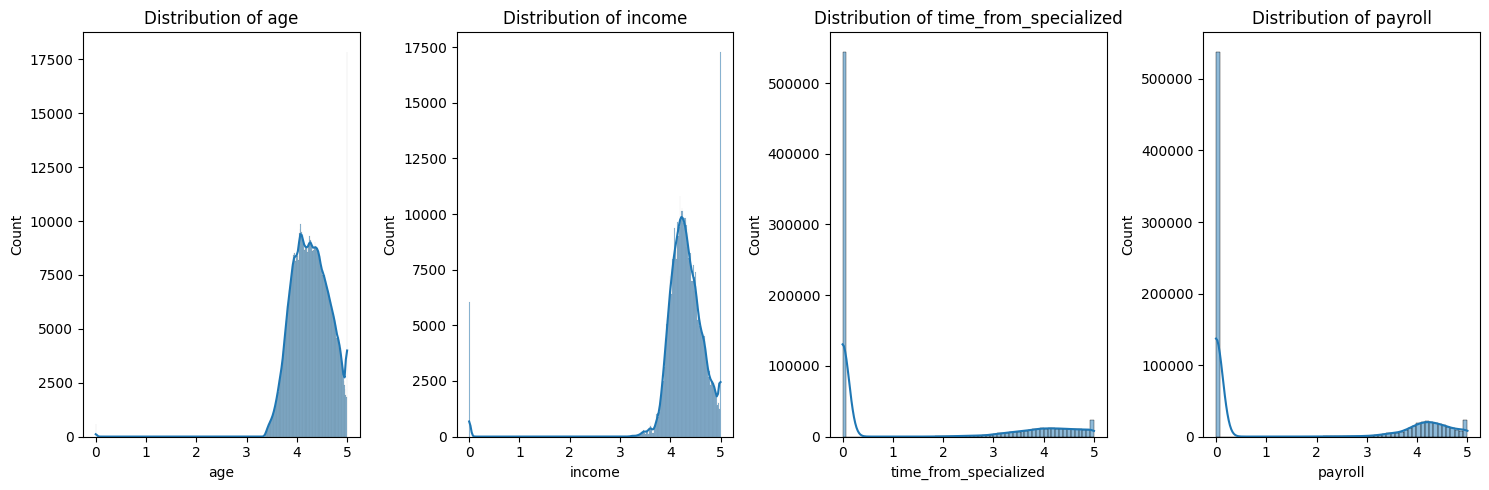

In [22]:
numerical_cols = ['age', 'income', 'time_from_specialized','payroll']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    sns.histplot(df_customers[col], ax=axes[i], kde=True)    
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


# 3. Balances - RCC

 Contiene los datos de los saldo de crédito del Reporte Crediticio Consolidado.

In [23]:
df_balance = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/archive/balances.csv')

In [24]:
df_balance.head()

,month,ID,type,product,entity,balance_amount,days_default,period
0,11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab...,type_7,product_2,entity_2,3.4051,5.0,period_5
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0,period_5
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5
3,6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254...,type_7,product_2,entity_2,2.8013,5.0,period_5
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5


In [40]:
df_balance[df_balance.period == 'period_9'].groupby(['month','period']).count()
#df_balance.isnull().sum()

,,ID,type,product,entity,balance_amount,days_default
month,period,,,,,,
1,period_9,105731,105731,105731,105731,105731,105731
2,period_9,107109,107109,107109,107109,107109,107109
3,period_9,108938,108938,108938,108938,108938,108938
4,period_9,111082,111082,111082,111082,111082,111082
5,period_9,112965,112965,112965,112965,112965,112965
6,period_9,114675,114675,114675,114675,114675,114675
7,period_9,115304,115304,115304,115304,115304,115304
8,period_9,116906,116906,116906,116906,116906,116906
9,period_9,117741,117741,117741,117741,117741,117741


Función para la creación de variables de la fuente de balance.

In [47]:
def varRCCPivot(df_balance, historia, pivot, cal = 'mean'):
    """
    df_balance: base de RCC
    historia: cantidad de meses para la historia (máximo 12)
    pivot: columna para el pivot
    cal: cálculo a realizar a las variables numéricas
    """
    # Pivot
    dfRCCVar = pd.pivot_table(df_balance[df_balance['month'] >= 12 - historia + 1], 
                                   index=['ID', 'period'], 
                                   columns=[pivot], 
                                   values=['balance_amount', 'days_default'], 
                                   aggfunc=cal, 
                                   fill_value=0)
    # Renombrar
    dfRCCVar.columns = [x[1]+'_' + x[0] + '_' +cal + '_' + str(historia) for x in dfRCCVar.columns]
    dfRCCVar.reset_index(inplace = True)
    
    return dfRCCVar

### Ejemplo

Cálculo del promedio de los últimos 12 meses de los tipos de crédito.

In [48]:
dfRccTypeMean12 = varRCCPivot(df_balance, 12, 'type', cal = 'mean')

In [45]:
dfRccTypeMean12.head()

,ID,period,type_1_balance_amount_mean_12,type_2_balance_amount_mean_12,type_3_balance_amount_mean_12,type_4_balance_amount_mean_12,type_5_balance_amount_mean_12,type_7_balance_amount_mean_12,type_1_days_default_mean_12,type_2_days_default_mean_12,type_3_days_default_mean_12,type_4_days_default_mean_12,type_5_days_default_mean_12,type_7_days_default_mean_12
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,period_6,0.0,0.0,3.190333,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,00007a4554cd3a350aec583adebe766eb0beef5684f3dd...,period_6,0.0,0.0,3.394012,0.0,0.000000,0.0,0.0,0.0,0.07855,0.0,0.0,0.0
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,period_5,0.0,0.0,2.385600,0.0,0.000000,0.0,0.0,0.0,5.00000,0.0,0.0,0.0
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,period_8,0.0,0.0,3.313423,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,period_5,0.0,0.0,3.614636,0.0,4.985392,0.0,0.0,0.0,0.20000,0.0,0.0,0.0


In [50]:
dfRccTypeMean12.groupby('ID').count().sort_values('ID')

,period,type_1_balance_amount_mean_12,type_2_balance_amount_mean_12,type_3_balance_amount_mean_12,type_4_balance_amount_mean_12,type_5_balance_amount_mean_12,type_7_balance_amount_mean_12,type_1_days_default_mean_12,type_2_days_default_mean_12,type_3_days_default_mean_12,type_4_days_default_mean_12,type_5_days_default_mean_12,type_7_days_default_mean_12
ID,,,,,,,,,,,,,
00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd92ba7d880f22dfc0c4a,1,1,1,1,1,1,1,1,1,1,1,1,1
00007a4554cd3a350aec583adebe766eb0beef5684f3ddca436ad026aee12c21,1,1,1,1,1,1,1,1,1,1,1,1,1
000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a24872e8a58b1fa66ce45a,1,1,1,1,1,1,1,1,1,1,1,1,1
00009bb00e84af44d1abc86b9fbd155842ffef6cad814d0244655051659fdbff,1,1,1,1,1,1,1,1,1,1,1,1,1
0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559eb5b40753a09ea532d,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff4968b6af50790f53a2c1385ba6a11e6b9d4a1e72f31ef2cfd42dc0e65ab8,1,1,1,1,1,1,1,1,1,1,1,1,1
ffff8c53a19d67e0651f65209b1072de29ccb82117e08a171caf5863b69afc53,1,1,1,1,1,1,1,1,1,1,1,1,1
ffff94ddba5c7e3396b55a61b5720354aee91c399ef46148b70093b136e11110,1,1,1,1,1,1,1,1,1,1,1,1,1


### Ejemplo

Cálculo del promedio de los últimos 12 meses por productos.

In [54]:
dfRccProductMean12 = varRCCPivot(df_balance, 12, 'product', cal = 'mean')

In [55]:
dfRccProductMean12.head()

,ID,period,product_1_balance_amount_mean_12,product_2_balance_amount_mean_12,product_3_balance_amount_mean_12,product_4_balance_amount_mean_12,product_5_balance_amount_mean_12,product_6_balance_amount_mean_12,product_7_balance_amount_mean_12,product_1_days_default_mean_12,product_2_days_default_mean_12,product_3_days_default_mean_12,product_4_days_default_mean_12,product_5_days_default_mean_12,product_6_days_default_mean_12,product_7_days_default_mean_12
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,period_6,0.000000,3.190333,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,00007a4554cd3a350aec583adebe766eb0beef5684f3dd...,period_6,3.611722,2.740880,0.0,0.0,0.0,0.000000,0.0,0.104733,0.0,0.0,0.0,0.0,0.0,0.0
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,period_5,2.385600,0.000000,0.0,0.0,0.0,0.000000,0.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,period_8,3.313423,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,period_5,3.586342,4.293700,0.0,0.0,0.0,4.985392,0.0,0.000000,5.0,0.0,0.0,0.0,0.0,0.0


# 4. Ahorros

Datos de los saldos de ahorro de los clientes.

In [56]:
df_liabilities = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/archive/liabilities.csv')

Función para la creación de variables de la fuente de ahorros.

In [57]:
def varLiabilities(df_liabilities, historia, dict_cal):
    """
    df_liabilities: base de ahorros
    historia: cantidad de meses para la historia (máximo 12)
    dict_cal: diccionario con los cálculos a realizar a las variables numéricas
    """
    
    dfVarLiabilities = df_liabilities[df_liabilities['month'] >= 12 - historia + 1].groupby(['ID', 'period'])\
                        .agg(
                            dict_cal
                        )

    dfVarLiabilities.columns = [ 'pas_'+ x[1]+'_' + x[0] + '_' + str(historia) for x in dfVarLiabilities.columns]

    dfVarLiabilities.reset_index(inplace = True)
    
    return dfVarLiabilities

Diccionario con los cálculos a realizar a las variables numéricas.

In [58]:
liabilities_dict = {
                        'product_1': ['min', 'mean', 'max'],
                        'product_2': ['min', 'mean', 'max'],
                        'month': ['count']
                    }

### Ejemplo

Cálculo de las variables de ahorro en los últimos 6 meses de datos.

In [59]:
dfVarLiabilities6 = varLiabilities(df_liabilities, 6, liabilities_dict)

In [60]:
dfVarLiabilities6.head()

,ID,period,pas_min_product_1_6,pas_mean_product_1_6,pas_max_product_1_6,pas_min_product_2_6,pas_mean_product_2_6,pas_max_product_2_6,pas_count_month_6
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,period_6,0.4939,1.949500,3.4815,0.000,0.0000,0.0000,6
1,000043cc1abd7597c99f494cc523ff99a4e0e64e98b128...,period_1,2.7086,3.132133,3.5701,0.073,0.6128,3.1542,6
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,period_5,3.9865,3.986500,3.9865,0.000,0.0000,0.0000,6
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,period_8,4.0464,4.099767,4.2115,0.000,0.0000,0.0000,6
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,period_5,2.6543,2.996833,3.9150,0.000,0.0000,0.0000,6


# 5. Compras

Posee los datos de las compras realizas con la tarjeta del banco en 4 rubros de comercios.

In [61]:
df_movements = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/archive/movements.csv')

In [62]:
df_movements.head()

,period,ID,month,type_1,type_2,type_3,type_4
0,period_9,a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c...,12,0.0000,0.0000,0.0000,3.9437
1,period_9,0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2...,1,3.7397,3.3499,0.0000,0.0000
2,period_9,a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56...,4,3.6273,3.9726,3.6655,4.4131
3,period_9,8a583965c827c377690b816c90246eaedc499f03a5f25f...,8,3.7855,4.8286,5.0000,4.5094
4,period_9,e53bf4249c7d6d573d532b8b0bad7ffe2fb203a4f00675...,7,2.6077,3.9344,1.3229,3.8061


Función para la creación de variables de compras.

In [63]:
def varMovements(df_movements, historia, dict_cal):
    """
    df_movements: base de compras
    historia: cantidad de meses para la historia (máximo 12)
    dict_cal: diccionario con los cálculos a realizar a las variables numéricas
    """
    dfVarMovements = df_movements[df_movements['month'] >= 12 - historia + 1].groupby(['ID', 'period'])\
                        .agg(
                            dict_cal
                        )

    dfVarMovements.columns = [ 'mov_'+ x[1]+'_' + x[0] + '_' + str(historia) for x in dfVarMovements.columns]

    dfVarMovements.reset_index(inplace = True)
    
    return dfVarMovements

Diccionario con los cálculos a realizar a las variables numéricas.

In [64]:
dic_movements = {
                    'type_1': ['min', 'mean', 'max', 'sum'],
                    'type_2': ['min', 'mean', 'max', 'sum'],
                    'type_3': ['min', 'mean', 'max', 'sum'],
                    'type_4': ['min', 'mean', 'max', 'sum'],
                    'month': ['count']
                }

### Ejemplo

Cálculo de las variables de compras en los últimos 12 meses de datos.

In [65]:
dfVarMovements12 = varMovements(df_movements, 12, dic_movements)

In [66]:
dfVarMovements12.head()

,ID,period,mov_min_type_1_12,mov_mean_type_1_12,mov_max_type_1_12,mov_sum_type_1_12,mov_min_type_2_12,mov_mean_type_2_12,mov_max_type_2_12,mov_sum_type_2_12,mov_min_type_3_12,mov_mean_type_3_12,mov_max_type_3_12,mov_sum_type_3_12,mov_min_type_4_12,mov_mean_type_4_12,mov_max_type_4_12,mov_sum_type_4_12,mov_count_month_12
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,period_6,0.0000,1.123000,2.2460,2.2460,0.0,0.0000,0.0000,0.0000,0.0,0.000000,0.0000,0.0000,0.0,1.306700,2.6134,2.6134,2
1,000043cc1abd7597c99f494cc523ff99a4e0e64e98b128...,period_1,0.0000,1.014900,2.0298,2.0298,0.0,0.0000,0.0000,0.0000,0.0,1.711350,3.4227,3.4227,0.0,0.000000,0.0000,0.0000,2
2,00007a4554cd3a350aec583adebe766eb0beef5684f3dd...,period_6,0.0000,0.483617,2.9017,2.9017,0.0,0.0000,0.0000,0.0000,0.0,2.439500,3.4955,14.6370,0.0,2.582583,3.3280,15.4955,6
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,period_8,3.2138,3.813633,5.0000,11.4409,0.0,1.1299,3.3897,3.3897,0.0,1.340067,4.0202,4.0202,0.0,0.000000,0.0000,0.0000,3
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,period_5,0.0000,0.574020,2.8701,2.8701,0.0,1.1580,2.9725,5.7900,0.0,0.480020,2.4001,2.4001,0.0,1.102720,2.8355,5.5136,5


# 6. Digital

Posee los datos de la navegación de los clientes en las plataformas digitales del banco.

In [70]:
df_digital = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/digital.csv')

In [ ]:
df_digital.head()

Función para la creación de variables digitales.

In [67]:
def varDigital(df_digital, historia, dict_cal):
    """
    df_digital: base digital
    historia: cantidad de meses para la historia (máximo 12)
    dict_cal: diccionario con los cálculos a realizar a las variables numéricas
    """
    dfVarDigital = df_digital[df_digital['month'] >= 12 - historia + 1].groupby(['ID', 'period'])\
                        .agg(
                            dict_cal
                        )

    dfVarDigital.columns = [ 'dig_'+ x[1]+'_' + x[0] + '_' + str(historia) for x in dfVarDigital.columns]

    dfVarDigital.reset_index(inplace = True)
    
    return dfVarDigital

Diccionario con los cálculos a realizar a las variables numéricas.

In [68]:
dic_digital = {
                'dig_1': ['min', 'mean', 'max', 'sum'],
                'dig_2': ['min', 'mean', 'max', 'sum'],
                'dig_3': ['min', 'mean', 'max', 'sum'],
                'dig_4': ['min', 'mean', 'max', 'sum'],
                'dig_5': ['min', 'mean', 'max', 'sum'],
                'dig_6': ['min', 'mean', 'max', 'sum'],
                'dig_7': ['min', 'mean', 'max', 'sum'],
                'dig_8': ['min', 'mean', 'max', 'sum'],
                'dig_9': ['min', 'mean', 'max', 'sum'],
                'dig_10': ['min', 'mean', 'max', 'sum'],
                'dig_11': ['min', 'mean', 'max', 'sum'],
                'month': ['count']
            }

### Ejemplo

Cálculo de las variables digitales en los últimos 12 meses de datos.

In [71]:
dfVarDigital12 = varDigital(df_digital, 12, dic_digital)

In [72]:
dfVarDigital12.head()

,ID,period,dig_min_dig_1_12,dig_mean_dig_1_12,dig_max_dig_1_12,dig_sum_dig_1_12,dig_min_dig_2_12,dig_mean_dig_2_12,dig_max_dig_2_12,dig_sum_dig_2_12,...,dig_sum_dig_9_12,dig_min_dig_10_12,dig_mean_dig_10_12,dig_max_dig_10_12,dig_sum_dig_10_12,dig_min_dig_11_12,dig_mean_dig_11_12,dig_max_dig_11_12,dig_sum_dig_11_12,dig_count_month_12
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,period_6,0.0000,1.267000,3.0905,11.4030,1.0457,3.262133,4.2168,29.3592,...,24.1292,0.0000,0.215422,1.9388,1.9388,0.5703,2.228956,3.9845,20.0606,9
1,00007a4554cd3a350aec583adebe766eb0beef5684f3dd...,period_6,1.4158,3.207900,5.0000,6.4158,3.7489,4.374450,5.0000,8.7489,...,2.4473,1.2233,1.581050,1.9388,3.1621,0.0001,0.772600,1.5451,1.5452,2
2,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,period_8,1.4274,2.583880,4.1650,25.8388,1.9321,3.770080,5.0000,37.7008,...,13.5465,0.0000,0.775060,1.8656,7.7506,0.0001,0.646870,1.2835,6.4687,10
3,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,period_5,1.3679,2.867718,5.0000,31.5449,2.6366,3.518500,4.9355,38.7035,...,22.2467,0.0000,0.701127,3.2312,7.7124,0.0001,1.442000,3.5520,15.8620,11
4,0000bb1dfb27cfb704a54c9b395b443461ff80e5dee265...,period_9,0.0487,0.788273,2.7136,8.6710,1.5163,2.790436,4.9344,30.6948,...,25.8005,0.0000,0.166691,1.8336,1.8336,0.0001,1.832082,4.4049,20.1529,11


# 7. Consolidar

Ahora se va a consolidar todas las fuentes en una matriz que servirá como input al modelo predictivo.

In [148]:
def getMatriz(universo = 'train'):
    
    if universo == 'train':
        df_universo = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/archive/universe_train.csv')
    else:
        df_universo = pd.read_csv('/kaggle/input/bbva-data-challenge-2023/archive/universe_test.csv')
        
    # Consolidar
    
    # Customer
    consolidado = pd.merge(df_universo, varCustomer(), how='left', on = ['ID'])
    
    # RCC
    consolidado = pd.merge(consolidado, varRCCPivot(df_balance, 12, 'type', cal = 'mean'), how='left', on = ['ID', 'period'])
    consolidado = pd.merge(consolidado, varRCCPivot(df_balance, 12, 'product', cal = 'mean'), how='left', on = ['ID', 'period'])
    consolidado = pd.merge(consolidado, varRCCPivot(df_balance, 12, 'entity', cal = 'mean'), how='left', on = ['ID', 'period'])
    ### pueden añadir más variables
    
    # Liabilities
    consolidado = pd.merge(consolidado, varLiabilities(df_liabilities, 6, liabilities_dict), how='left', on = ['ID', 'period'])
    consolidado = pd.merge(consolidado, varLiabilities(df_liabilities, 3, liabilities_dict), how='left', on = ['ID', 'period'])
    
    # Movements
    consolidado = pd.merge(consolidado, varMovements(df_movements, 6, dic_movements), how='left', on = ['ID', 'period'])
    consolidado = pd.merge(consolidado, varMovements(df_movements, 3, dic_movements), how='left', on = ['ID', 'period'])
    
    # Digital
    consolidado = pd.merge(consolidado, varDigital(df_digital, 6, dic_digital), how='left', on = ['ID', 'period'])
    consolidado = pd.merge(consolidado, varDigital(df_digital, 3, dic_digital), how='left', on = ['ID', 'period'])
    
    return consolidado

**Matriz de entrenamiento**

In [149]:
matrix_train = getMatriz(universo = 'train')

**Matriz de evaluación para el envío**

In [150]:
matrix_submit = getMatriz(universo = 'test')

In [76]:
matrix_train.head()

,ID,attrition,period,age,income,time_from_specialized,payroll,product_1,product_2,product_3,...,dig_sum_dig_9_12,dig_min_dig_10_12,dig_mean_dig_10_12,dig_max_dig_10_12,dig_sum_dig_10_12,dig_min_dig_11_12,dig_mean_dig_11_12,dig_max_dig_11_12,dig_sum_dig_11_12,dig_count_month_12
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.000,0.0,0,0,0,...,43.0254,0.0,1.484033,2.9024,17.8084,2.3975,3.321883,3.8992,39.8626,12.0
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5,4.5476,4.2447,4.274,0.0,0,0,0,...,12.7762,0.0,0.000000,0.0000,0.0000,0.0001,0.413200,1.2887,4.5452,11.0
2,270d8f8f607d19886c50edb7746c3670194134b56d31e2...,0,period_5,4.3600,4.2117,0.000,0.0,0,0,0,...,44.7753,0.0,0.894267,1.9812,10.7312,3.0901,3.543000,3.7608,42.5160,12.0
3,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5,4.3914,4.1584,0.000,0.0,0,0,0,...,9.1120,0.0,0.156250,1.2500,1.2500,0.0001,0.386325,0.9748,3.0906,8.0
4,98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7...,0,period_5,4.3077,4.3285,0.000,0.0,0,0,0,...,40.3018,0.0,0.208333,1.2500,2.5000,2.3975,3.038483,3.9425,36.4618,12.0


In [78]:
matrix_train.isnull().sum()

ID                         0
attrition                  0
period                     0
age                        0
income                     0
                       ...  
dig_min_dig_11_12     110191
dig_mean_dig_11_12    110191
dig_max_dig_11_12     110191
dig_sum_dig_11_12     110191
dig_count_month_12    110191
Length: 133, dtype: int64

In [77]:
matrix_submit.head()

,ID,period,age,income,time_from_specialized,payroll,product_1,product_2,product_3,product_4,...,dig_sum_dig_9_12,dig_min_dig_10_12,dig_mean_dig_10_12,dig_max_dig_10_12,dig_sum_dig_10_12,dig_min_dig_11_12,dig_mean_dig_11_12,dig_max_dig_11_12,dig_sum_dig_11_12,dig_count_month_12
0,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,4.5311,4.6605,0.0,0.0000,1,0,0,1,...,47.2103,2.3138,4.025692,5.0000,48.3083,3.2128,3.728017,3.9531,44.7362,12.0
1,4881d4a2146002a02279bedb6f0a844af022b4dd1d8b1b...,period_9,4.4933,4.0892,0.0,0.0000,1,0,0,1,...,3.2416,0.0000,0.578450,1.1569,2.3138,0.0001,0.000100,0.0001,0.0004,4.0
2,28ff12351f215091b54166a09ca44858f3d7f6245f281c...,period_9,4.2952,4.2946,0.0,0.0000,0,0,0,1,...,38.3992,0.0000,0.804017,1.8336,9.6482,1.9343,2.851767,3.6315,34.2212,12.0
3,5cd2c0dc92c1c5ffa83a94f15756cef5c58174e9d8c69a...,period_9,4.4648,4.5815,0.0,4.6569,1,0,0,1,...,43.1590,1.8336,2.465367,4.0022,29.5844,2.8114,3.325175,3.8242,39.9021,12.0
4,ceebdd2bbaafd83d8c205e8071b79da5338e9db94c9509...,period_9,4.3032,3.9967,0.0,3.7965,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
matrix_submit.isnull().sum()

ID                           0
period                       0
age                          0
income                       0
time_from_specialized        0
                         ...  
dig_min_dig_11_12        53747
dig_mean_dig_11_12       53747
dig_max_dig_11_12        53747
dig_sum_dig_11_12        53747
dig_count_month_12       53747
Length: 132, dtype: int64

# 8. Seleccionar X e y

El objetivo es generar las bases de train - test para el entrenamiento de datos.

In [80]:
from sklearn.model_selection import train_test_split

Variables que no se considerarán en el modelos

In [81]:
columnas_eliminar = ['ID', 'attrition', 'period']

Seleccionar X e Y

In [151]:
X = matrix_train.drop(columnas_eliminar, axis=1).copy()
y = matrix_train['attrition'].copy()

Partición aleatoria en train y test.

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=142, stratify=y)

# 9. Modelo LightGBM

In [153]:
import lightgbm as lgb
from lightgbm import early_stopping
from lightgbm import log_evaluation
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))

<Figure size 4000x2000 with 0 Axes>

<Figure size 4000x2000 with 0 Axes>

In [155]:
train_data_lgb = lgb.Dataset(X_train, label=y_train)
test_data_lgb = lgb.Dataset(X_test, label=y_test)

Parámetros de lightgbm, para mayor información revisar: https://lightgbm.readthedocs.io/en/latest/Parameters.html

In [156]:
params_k = {
            'boosting_type': 'gbdt',
            'objective': 'multiclass',
            'num_class': 6,
            'subsample': 0.95,
            'learning_rate': 0.01,
            'max_depth': 10,
            'num_leaves': 50,
            'feature_fraction': 0.9,
            #'max_bin': 100,
            'is_unbalance': True,
            'boost_from_average': True,
            "random_seed":142,
            'verbose': -1
}

Entrenamiento

In [157]:
model = lgb.train(params_k,
                       train_data_lgb,
                       valid_sets=[test_data_lgb, train_data_lgb],
                       num_boost_round=1000,
                       #early_stopping_rounds=100, verbose_eval=50
                       callbacks=[early_stopping(100), log_evaluation(100)]
                 )

Training until validation scores don't improve for 100 rounds
[100]	training's multi_logloss: 0.396418	valid_0's multi_logloss: 0.410413
[200]	training's multi_logloss: 0.368065	valid_0's multi_logloss: 0.390663
[300]	training's multi_logloss: 0.353162	valid_0's multi_logloss: 0.384036
[400]	training's multi_logloss: 0.342858	valid_0's multi_logloss: 0.381299
[500]	training's multi_logloss: 0.334705	valid_0's multi_logloss: 0.380049
[600]	training's multi_logloss: 0.327487	valid_0's multi_logloss: 0.379399
[700]	training's multi_logloss: 0.320949	valid_0's multi_logloss: 0.37898
[800]	training's multi_logloss: 0.314868	valid_0's multi_logloss: 0.378724
[900]	training's multi_logloss: 0.309213	valid_0's multi_logloss: 0.378567
[1000]	training's multi_logloss: 0.303906	valid_0's multi_logloss: 0.378438
Did not meet early stopping. Best iteration is:
[1000]	training's multi_logloss: 0.303906	valid_0's multi_logloss: 0.378438


Gráfica de variables importantes

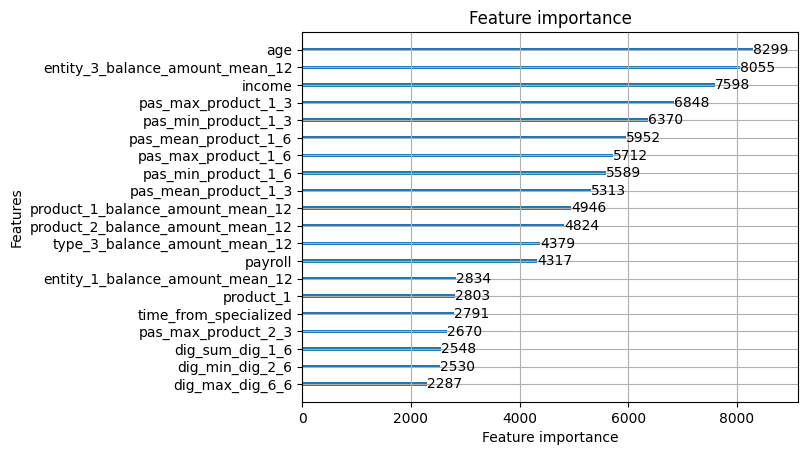

In [158]:
ax = lgb.plot_importance(model, max_num_features=20)
plt.show()

Predicción de train y test

In [159]:
prediccion_lgb_test = model.predict(X_test, num_iteration=model.best_iteration)
prediccion_lgb_train = model.predict(X_train, num_iteration=model.best_iteration)

Medición del F1

In [160]:
print('train', f1_score(y_train, np.argmax(prediccion_lgb_train, axis=1), average='macro'))
print('test ', f1_score(y_test, np.argmax(prediccion_lgb_test, axis=1), average='macro'))

train 0.3738240284630785
test  0.2498767579702529


**Predicciones para el envío**

In [161]:
prediccion_lgb_submit = model.predict(matrix_submit[X_train.columns], num_iteration=model.best_iteration)

Recordar el formato del archivo de envío.

In [162]:
submit = matrix_submit[['period', 'ID']].copy()

In [163]:
submit['target'] = np.argmax(prediccion_lgb_submit, axis=1)

In [101]:
submit.head()

,period,ID,target
0,period_9,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,0
1,period_9,4881d4a2146002a02279bedb6f0a844af022b4dd1d8b1b...,0
2,period_9,28ff12351f215091b54166a09ca44858f3d7f6245f281c...,0
3,period_9,5cd2c0dc92c1c5ffa83a94f15756cef5c58174e9d8c69a...,0
4,period_9,ceebdd2bbaafd83d8c205e8071b79da5338e9db94c9509...,0


Archivo para el envío

In [164]:
submit.to_csv('submit_2330.csv', index=False)

XGBoost

In [165]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [169]:
model_x = xgb.XGBClassifier(
    learning_rate=0.1,  
    n_estimators=100,   
    max_depth=50,        
    subsample=0.9,      
    colsample_bytree=0.8, 
    objective='multi:softmax',  
    num_class=6,                
    random_state=142             
)

In [ ]:
model_x.fit(X_train, y_train)

In [ ]:
prediccion_xgb_test = model_x.predict(X_test, num_iteration=model.best_iteration)
prediccion_xgb_train = model_x.predict(X_train, num_iteration=model.best_iteration)

In [ ]:
print('train', f1_score(y_train, np.argmax(prediccion_xgb_train, axis=1), average='macro'))
print('test ', f1_score(y_test, np.argmax(prediccion_xgb_test, axis=1), average='macro'))

In [ ]:
prediccion_xgb_submit = model_x.predict(matrix_submit[X_train.columns], num_iteration=model.best_iteration)

In [ ]:
submit = matrix_submit[['period', 'ID']].copy()

In [ ]:
submit['target'] = np.argmax(prediccion_xgb_submit, axis=1)

In [ ]:
submit.to_csv('submit_2330.csv', index=False)